<a href="https://colab.research.google.com/github/ruchibhadauria/machine-learning/blob/master/MushroomClassification/mushroomclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement** : Mushroom hunting, mushrooming, mushroom picking, mushroom foraging, and similar terms describe the activity of gathering mushrooms in the wild, typically for culinary use. This practice is popular throughout most of Europe, Australia, Japan, Korea, parts of the Middle East, and the Indian subcontinent, as well as the temperate regions of Canada and the United States.

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [5]:
Image(url = 'https://www.anatomynote.com/wp-content/uploads/2018/09/3937/Mushroom-anatomical-structure.gif',width=800,height=400)


- **classes**: edible=e, poisonous=p
- **cap-shape**: bell=b,conical=c, convex=x, flat=f, knobbed=k,sunken=s
- **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
- **cap-color**:  brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- **bruises**: bruises=t, no=f
- **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- **gill-attachment**: attached=a, descending=d, free=f, notched=n
- **gill-spacing**: close=c, crowded=w, distant=d
- **gill-size**: broad=b, narrow=n
- **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- **stalk-shape**: enlarging=e, tapering=t
- **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
- **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
- **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- **veil-type**: partial=p, universal=u
- **veil-color**: brown=n, orange=o, white=w, yellow=y
- **ring-number**: none=n, one=o, two=t
- **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [6]:
# Read the dataset 
mushroom_df = pd.read_csv('mushrooms.csv')

In [7]:
print('\033[1m', 'First five rows of the dataset.', '\033[0m')
mushroom_df.head()

 First five rows of the dataset. 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [8]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
print('\033[1m', 'Statistical summary of all the columns', '\033[0m')
mushroom_df.describe()

 Statistical summary of all the columns 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
# Dealing with missing values in stalk-root column
mushroom_df['stalk-root'].replace('?', np.nan, inplace=True)
print('\033[1m', 'Value counts for stalk root before filling missing values: ', '\033[0m', mushroom_df['stalk-root'].value_counts(), sep='\n')
print('\033[1m', '\nNumber of null values: ', '\033[1m', mushroom_df['stalk-root'].isnull().sum())
mushroom_df['stalk-root'].fillna(mushroom_df['stalk-root'].mode()[0], inplace=True)
print('\033[1m', 'Value counts for stalk root after filling missing values with mode: ', '\033[0m', mushroom_df['stalk-root'].value_counts(), sep='\n')


Value counts for stalk root before filling missing values: 

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
 
Number of null values:   2480

Value counts for stalk root after filling missing values with mode: 

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


In [11]:
view_df = mushroom_df.copy()

# Creating labels for each column
labels = {
    'class': {'e':'edible', 'p':'poisonous'},
    'cap-shape': {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'},
    'cap-surface': {'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'},
    'cap-color': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'bruises': {'t':'bruises', 'f':'no'},
    'odor': {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent', 's':'spicy'},
    'gill-attachment': {'a':'attached', 'f':'free', 'd':'descending', 'n':'notched'},
    'gill-spacing': {'c':'close', 'w':'crowded', 'd':'distant'},
    'gill-size': {'b':'broad', 'n':'narrow'},
    'gill-color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray', 'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk-shape': {'e':'enlarging', 't':'tapering'},
    'stalk-root': {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 'z':'rhizomorphs', 'r':'rooted'},
    'stalk-surface-above-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk-surface-below-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk-color-above-ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk-color-below-ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'veil-type': {'p':'partial', 'u':'universal'},
    'veil-color': {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'},
    'ring-number': {'n':'none', 'o':'one', 't':'two'},
    'ring-type': {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large', 'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'},
    'spore-print-color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'},
    'population': {'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 'v':'several', 'y':'solitary'},
    'habitat': {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'}
    }
view_df.replace(labels, inplace=True)

In [12]:
# Defining a function to plot countplots of various columns from the dataset
def plot_countplots(col):
    fig=plt.figure(figsize=(22, 10));
    plt.subplot(221);
    sns.countplot(x=col, data=view_df, order=view_df[col].value_counts().index, palette='summer');
    sns.set_style('whitegrid');
    sns.despine(left=True);
    plt.xlabel('{} of the Mushroom'.format(col.replace('-', ' ').capitalize()), fontsize=16);
    plt.ylabel('');
    plt.title('Distribution of mushroom by {}'.format(col.replace('-', ' ')), fontsize=22, pad=10);
    plt.subplot(222);
    sns.countplot(x=col, data=view_df, hue='class', order=view_df[col].value_counts().index, palette='summer');
    plt.xlabel('{} of the Mushroom'.format(col.replace('-', ' ').capitalize()), fontsize=16);
    sns.set_style('whitegrid');
    sns.despine(left=True);
    plt.ylabel('');
    plt.title('Distribution of mushroom by {} and class'.format(col.replace('-', ' ')), fontsize=22, pad=10);
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', fontsize=12);
    plt.show();

# Data Exploration

### Cap Shape

In [61]:
Image(url = 'https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic15')

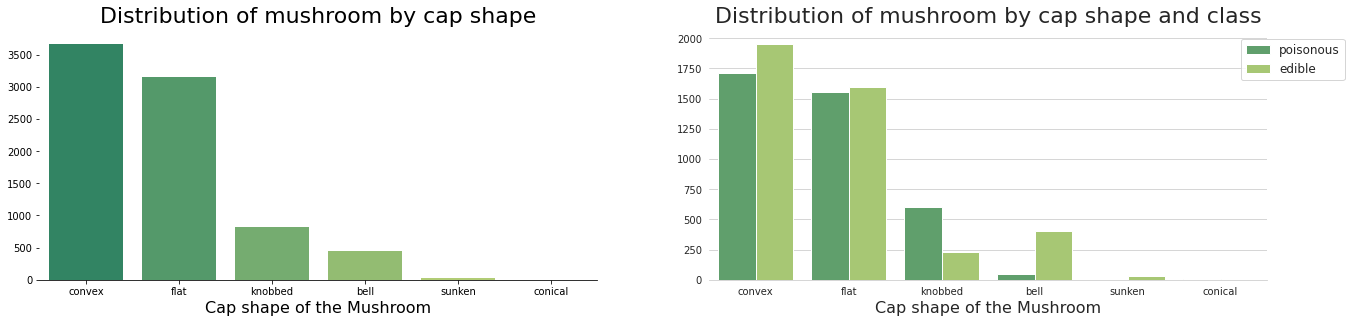

In [14]:
plot_countplots('cap-shape')

- Convex and flats make up the majority of the cap shape of mushrooms. 
- Mushrooms with cap shape of bell appear to be more edible than other cap shapes.

### Cap surface

In [60]:
Image(url = 'https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic16')

For dataset;

Cap surface of scaly contains both raised scales and flat scales.

Grooves = Patches

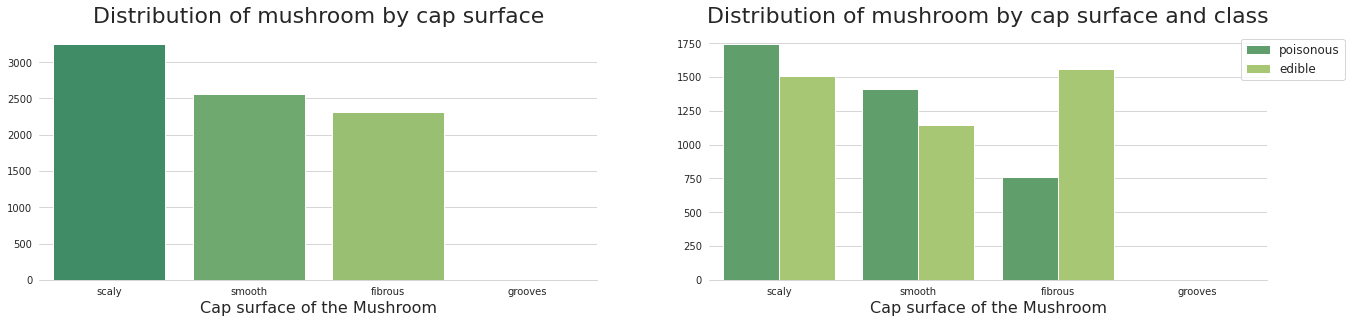

In [16]:
plot_countplots('cap-surface')

### Cap color

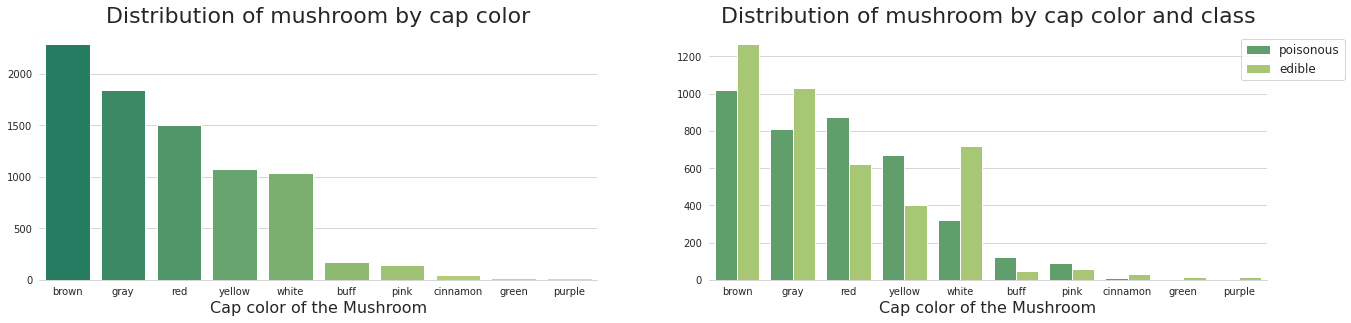

In [17]:
plot_countplots('cap-color')

### Bruises

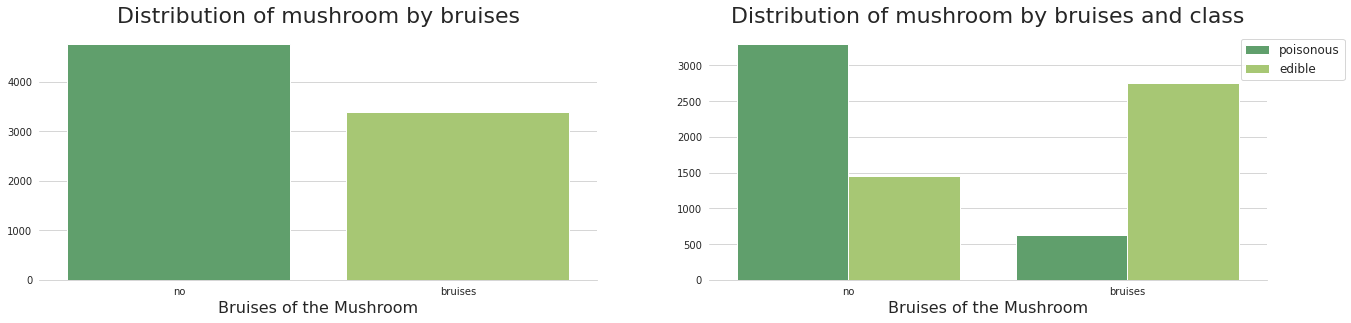

In [18]:
plot_countplots('bruises')

- Mushrooms with bruises are more edible than the not bruises mushrooms.

### Odor

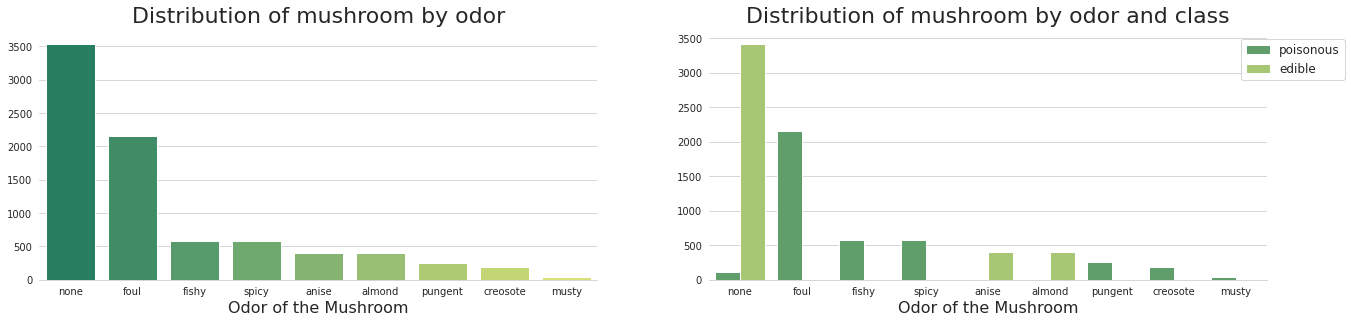

In [19]:
plot_countplots('odor')

- According to the graph, none and foul-smelling mushrooms are common.
- According to the graph, the odor of the mushrooms will play an important role in distinguishing the class of the mushrooms.

### Gill attachment

In [59]:
Image(url = 'https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic19')

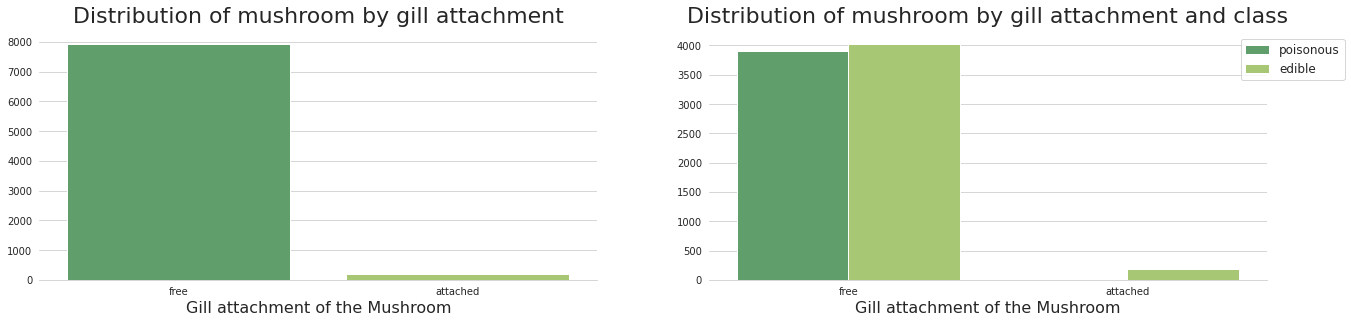

In [21]:
plot_countplots('gill-attachment')

- Appears to be unbalanced in terms of the gill attachment.
- Free gill attachments are almost half edible or poisonous.

### Gill spacing

In [22]:
Image(url = 'https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic17')

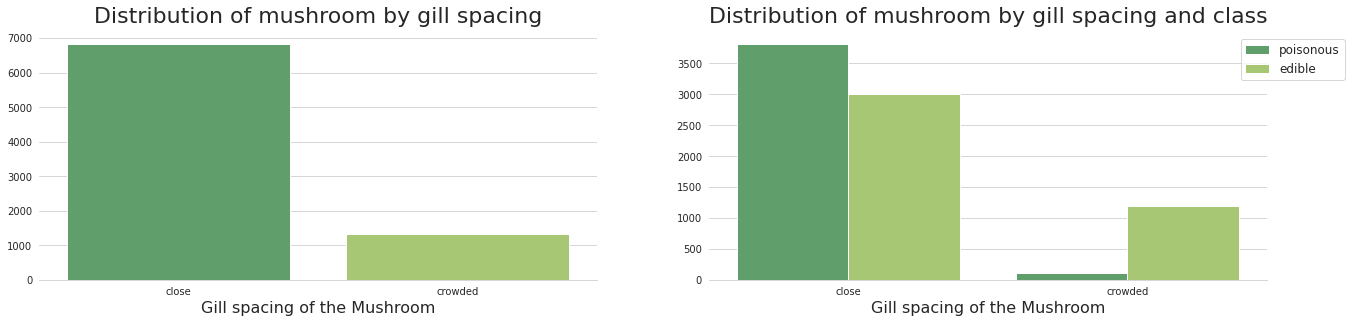

In [23]:
plot_countplots('gill-spacing')

- Appears to be unbalanced in terms of the gill spacing.
- Crowded gill spacing  more edible than the close gill spacing.

### Gill size

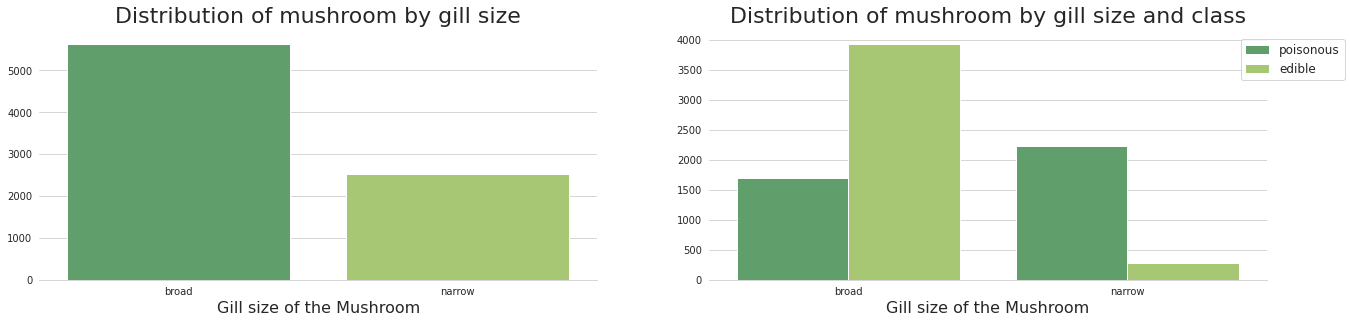

In [24]:
plot_countplots('gill-size')

- Narrow gill size looks more poisonous than the broad gill size

### Gill color

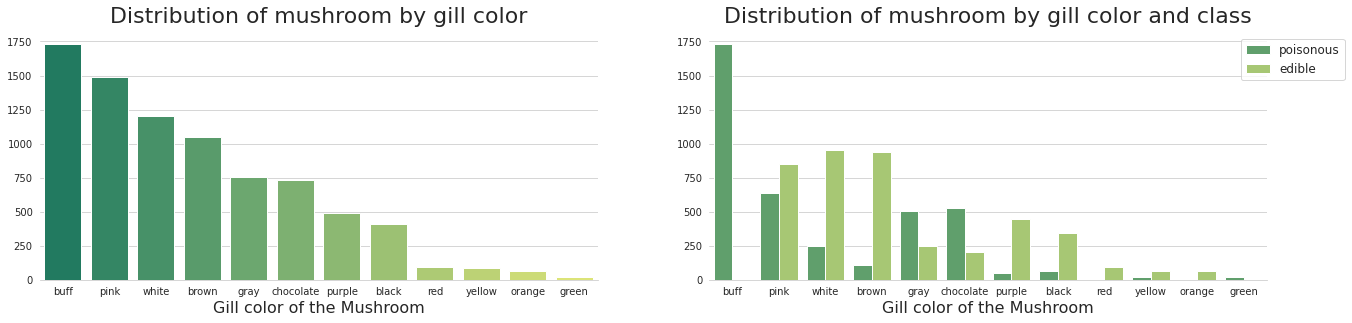

In [25]:
plot_countplots('gill-color')

- If Gill color is buff do not eat that mushroom.

### Stalk shape

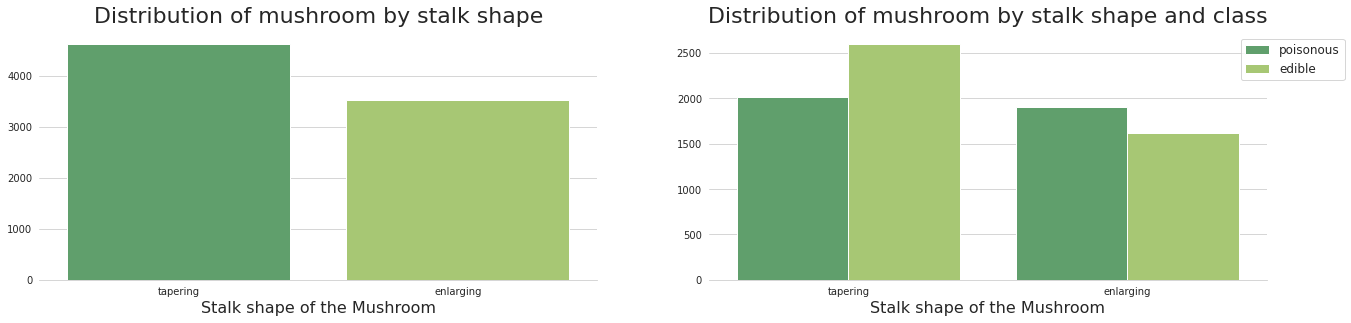

In [26]:
plot_countplots('stalk-shape')

### Stalk root

In [58]:
Image(url = 'https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic21')

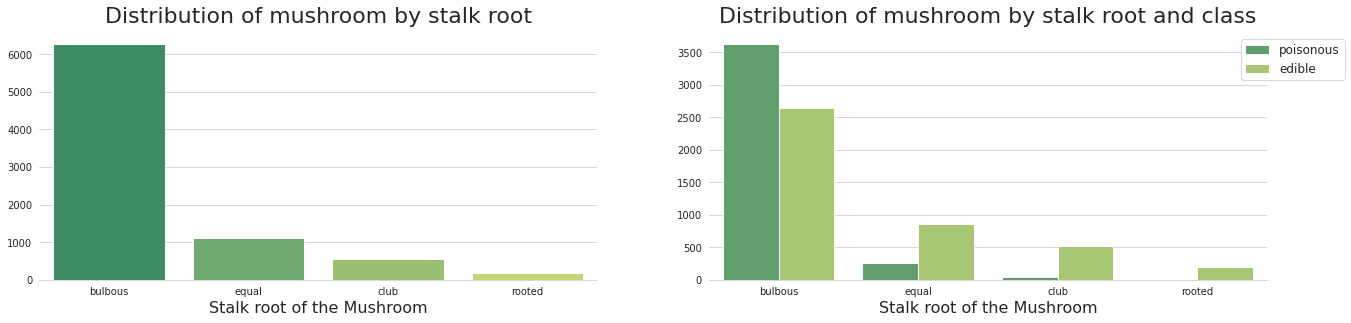

In [28]:
plot_countplots('stalk-root')

### Stalk surface below ring

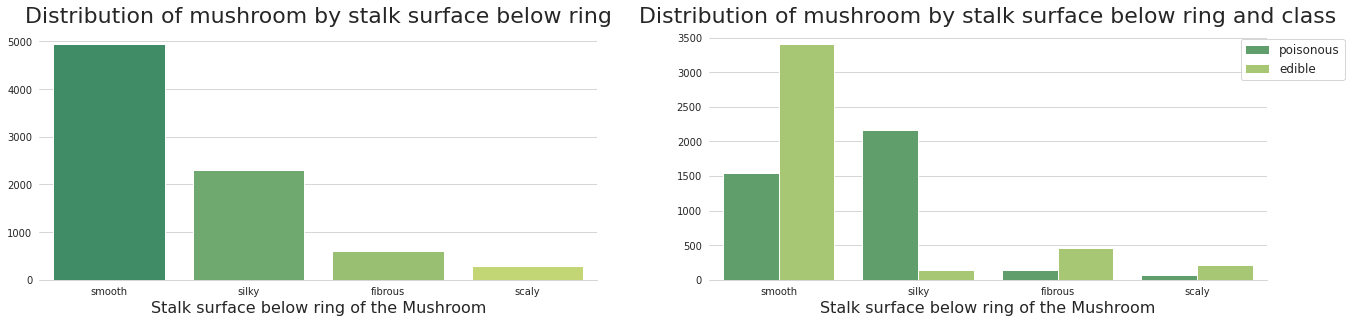

In [29]:
plot_countplots('stalk-surface-below-ring')

- Stalk Surface with silky looks more poisonous  than than other types of Stalk Surface

### Stalk surface above ring

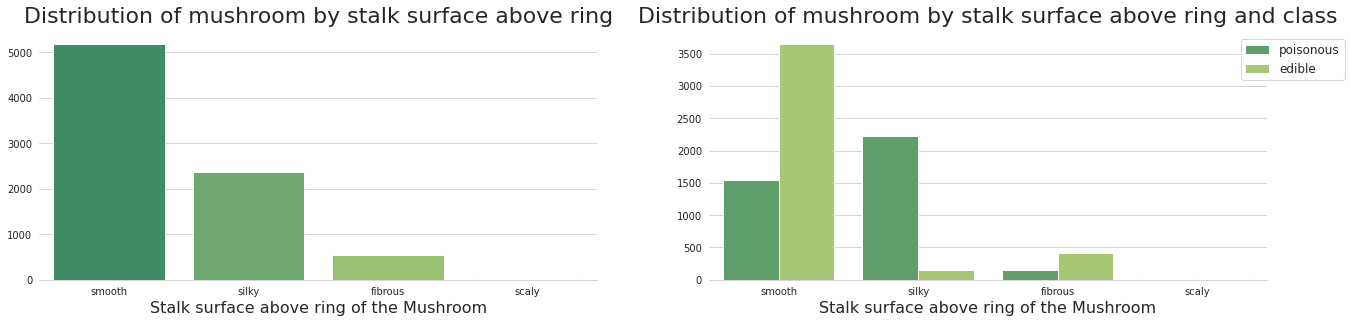

In [30]:
plot_countplots('stalk-surface-above-ring')

- Stalk Surface with silky looks more poisonous  than than other types of Stalk Surface

### Stalk color below ring

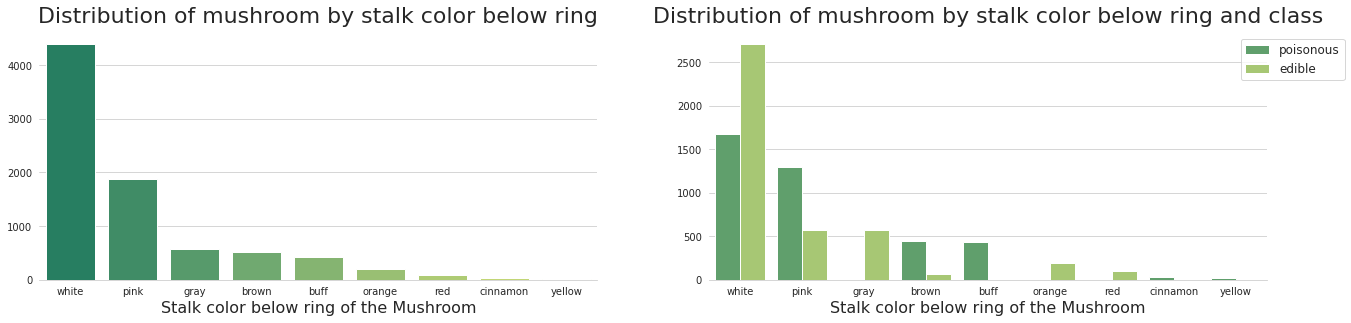

In [31]:
plot_countplots('stalk-color-below-ring')

- Stalk Color Below Ring with pink,brown and buff seems more poisonous.

### Stalk color above ring

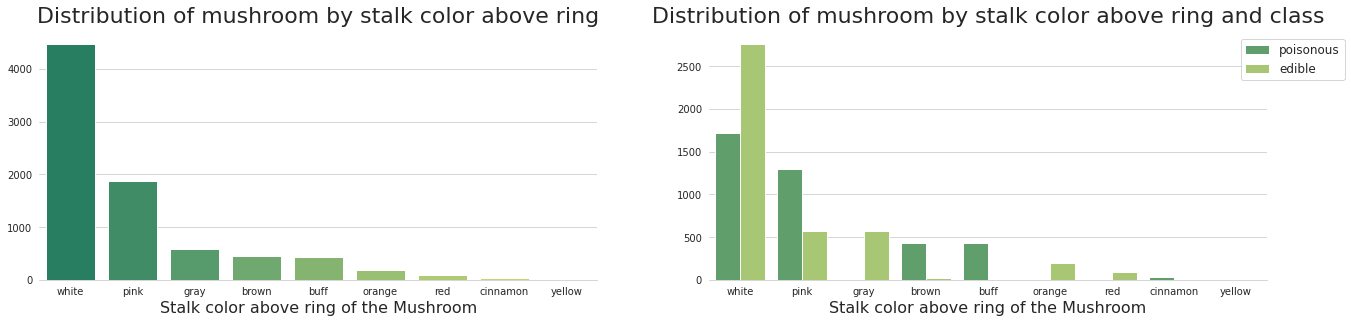

In [32]:
plot_countplots('stalk-color-above-ring')

- Stalk Color Above Ring with pink,brown and buff seems more poisonous.

### Veil type

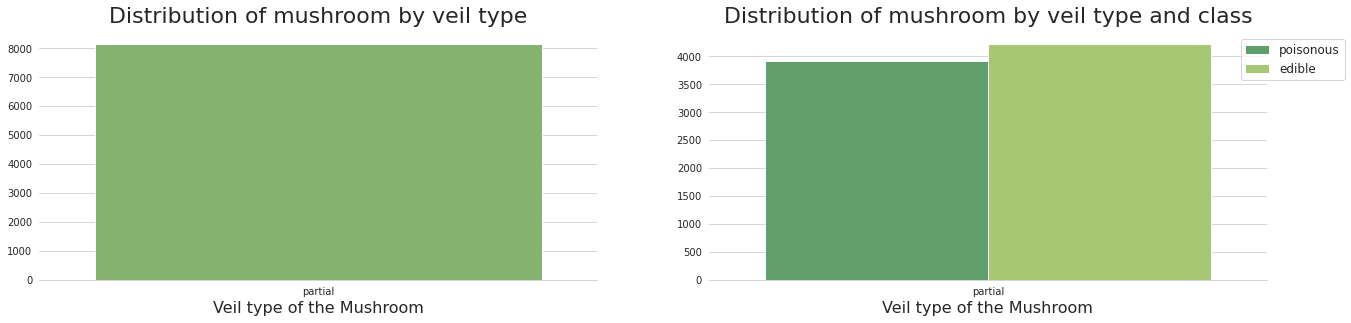

In [33]:
plot_countplots('veil-type')

### Veil color

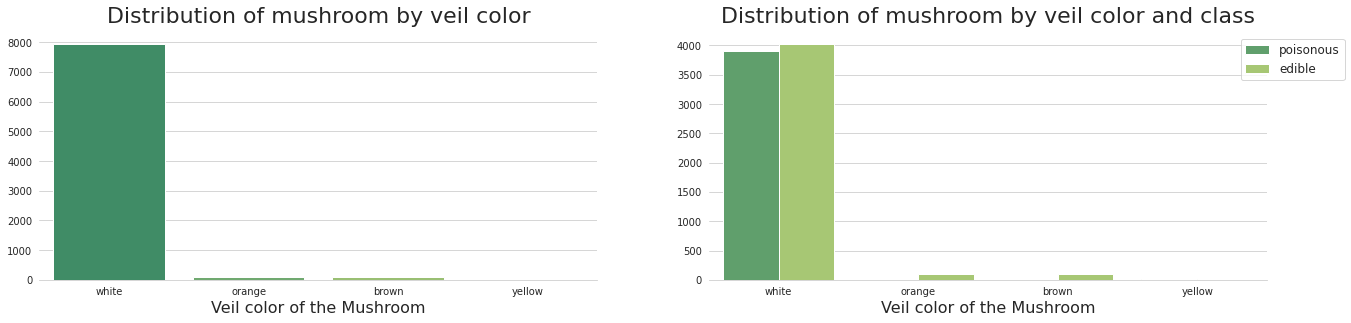

In [34]:
plot_countplots('veil-color')

- Appears to be unbalanced in terms of veil color

### Ring number

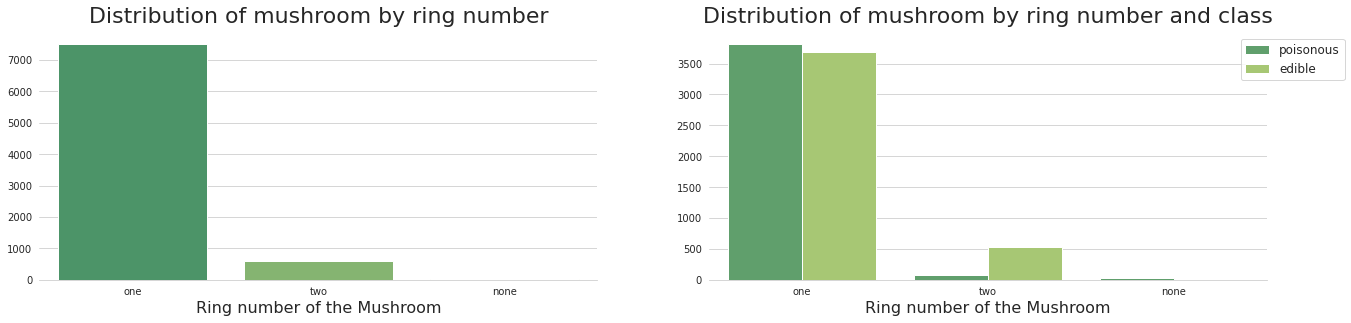

In [35]:
plot_countplots('ring-number')

### Ring type

In [57]:
Image(url = 'https://www.usask.ca/biology/fungi/graphics/glossary_pictures/glossary_pic20')

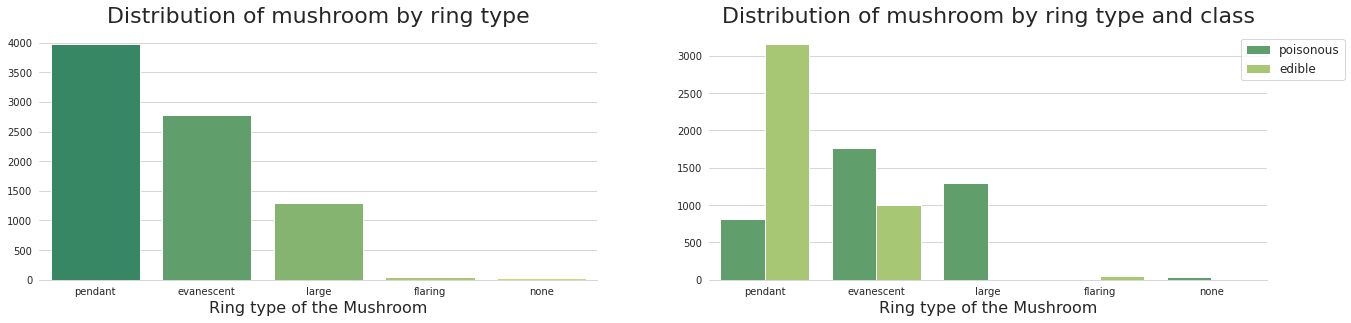

In [37]:
plot_countplots('ring-type')

- Large ring type in mushroom seems dangerous.

### Spore print color

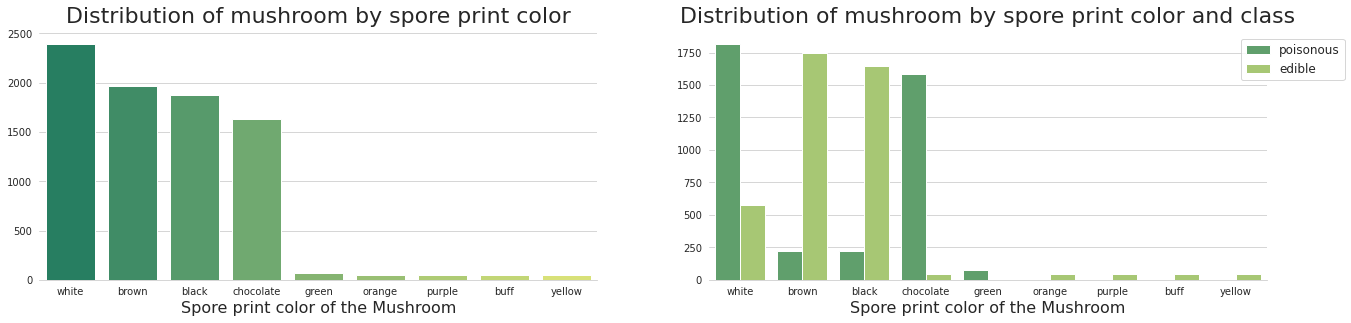

In [38]:
plot_countplots('spore-print-color')

- White and chocolate spore prints looks more poisonous than other colors.

### Population

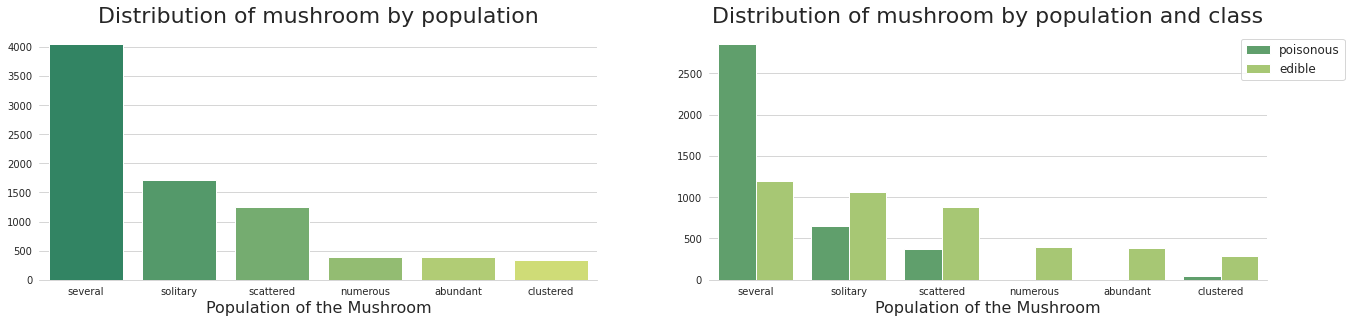

In [39]:
plot_countplots('population')

### Habitat

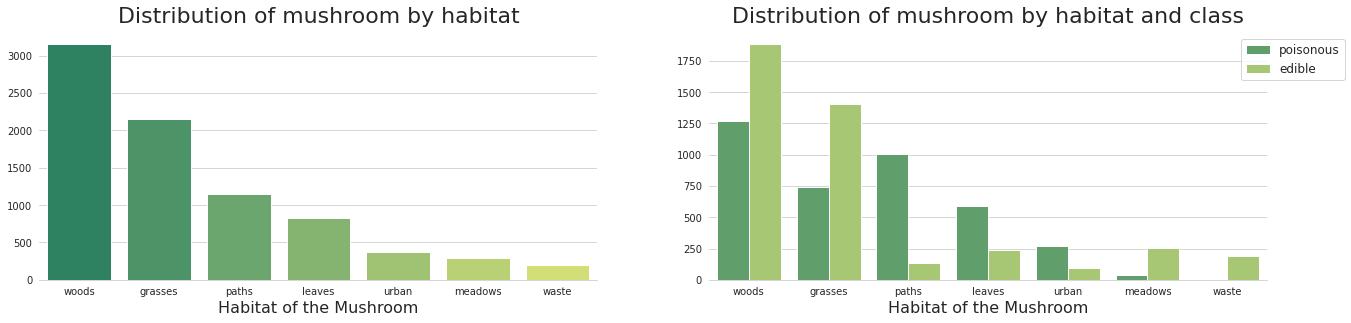

In [40]:
plot_countplots('habitat')

# Preprocessing

**Label Encoder**
- Most of the sklearn functions expect that the data with number labels rather than word labels. Hence, we need to convert such labels into number labels. This process is called label encoding.

In [41]:
le = LabelEncoder()
for col in list(view_df.columns):
    view_df[col] = le.fit_transform(view_df[col])

In [42]:
print('\033[1m\033[4mDataset after encoding with Label Encoder\033[0m')
view_df

Dataset after encoding with Label Encoder


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,0,2,3,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,0,1,3,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,0,1,3,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,0,2,3,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,1,2,3,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,0,0,3,3,4,4,0,1,1,4,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,0,0,3,3,4,4,0,0,1,4,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,0,0,3,3,4,4,0,1,1,4,2,1,1
8122,1,4,2,0,1,3,1,0,1,2,1,0,3,2,7,7,0,2,1,0,7,4,1


In [43]:
# Drop the target column
X = view_df.drop('class', axis=1)
y = view_df['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,2,3,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,1,3,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,1,3,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,2,3,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,2,3,3,7,7,0,2,1,0,1,0,0


**OneHotEncoder**

- Encode categorical integer features using a one-hot aka one-of-K scheme.
- The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features.
- The output will be a sparse matrix where each column corresponds to one possible value of one feature.
- It is assumed that input features take on values in the range [0, n_values).
- This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [44]:
# Encode the label encoded dataset
one_hot = OneHotEncoder()
X = one_hot.fit_transform(X).toarray()

In [45]:
# Return feature names for output features.
print('\033[1m\033[4m', 'Feature names after one hot encoding', '\033[0m')
one_hot.get_feature_names()

 Feature names after one hot encoding 


array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x1_0', 'x1_1',
       'x1_2', 'x1_3', 'x2_0', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5',
       'x2_6', 'x2_7', 'x2_8', 'x2_9', 'x3_0', 'x3_1', 'x4_0', 'x4_1',
       'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x5_0',
       'x5_1', 'x6_0', 'x6_1', 'x7_0', 'x7_1', 'x8_0', 'x8_1', 'x8_2',
       'x8_3', 'x8_4', 'x8_5', 'x8_6', 'x8_7', 'x8_8', 'x8_9', 'x8_10',
       'x8_11', 'x9_0', 'x9_1', 'x10_0', 'x10_1', 'x10_2', 'x10_3',
       'x11_0', 'x11_1', 'x11_2', 'x11_3', 'x12_0', 'x12_1', 'x12_2',
       'x12_3', 'x13_0', 'x13_1', 'x13_2', 'x13_3', 'x13_4', 'x13_5',
       'x13_6', 'x13_7', 'x13_8', 'x14_0', 'x14_1', 'x14_2', 'x14_3',
       'x14_4', 'x14_5', 'x14_6', 'x14_7', 'x14_8', 'x15_0', 'x16_0',
       'x16_1', 'x16_2', 'x16_3', 'x17_0', 'x17_1', 'x17_2', 'x18_0',
       'x18_1', 'x18_2', 'x18_3', 'x18_4', 'x19_0', 'x19_1', 'x19_2',
       'x19_3', 'x19_4', 'x19_5', 'x19_6', 'x19_7', 'x19_8', 'x20_0',
       'x20_1',

## Splitting the data into training and test set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
print('\033[1m\033[4m Shape of training set features:\033[0m', X_train.shape, 
      '\033[1m\033[4m Shape of training set target:\033[0m', y_train.shape,
      '\033[1m\033[4m Shape of test set features:\033[0m', X_test.shape,
      '\033[1m\033[4m Shape of test set features:\033[0m', y_test.shape,
      sep='\n')

 Shape of training set features:
(5686, 116)
 Shape of training set target:
(5686,)
 Shape of test set features:
(2438, 116)
 Shape of test set features:
(2438,)


# Model comparison using cross validation

## Logistic Regression

 Cross val accuracy:   [1.         1.         0.99824253 1.         1.         1.
 1.         1.         1.         0.99823944]  

 Mean of cross val accuracies:   0.9996481967375429


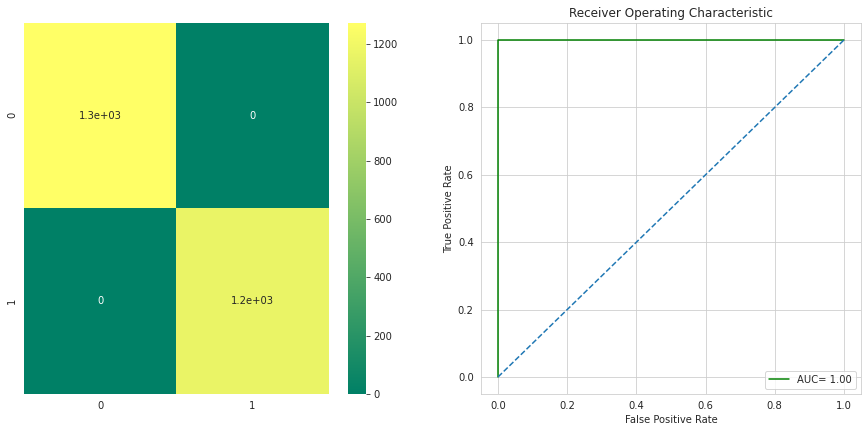

In [48]:
clf = LogisticRegression().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## GaussianNB

 Cross val accuracy:   [0.94376098 0.95079086 0.93848858 0.94376098 0.96660808 0.95957821
 0.95598592 0.95246479 0.95774648 0.95598592]  

 Mean of cross val accuracies:   0.952517079630684


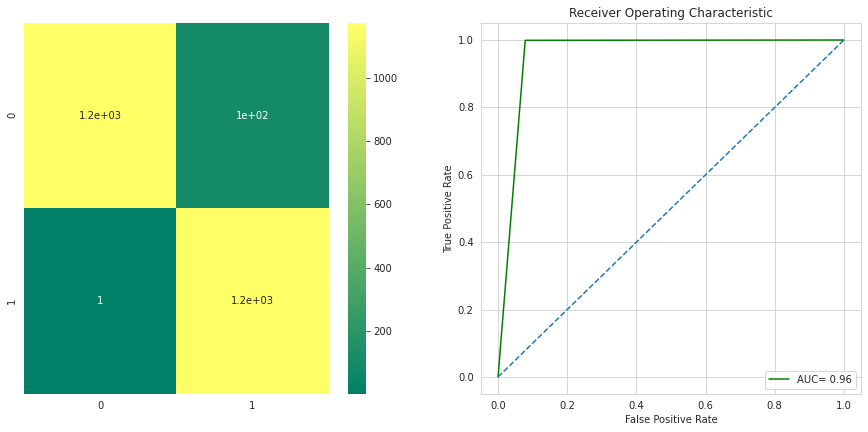

In [49]:
clf = GaussianNB().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## Decision Tree Classifier

 Cross val accuracy:   [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99823944]  

 Mean of cross val accuracies:   0.9998239436619718


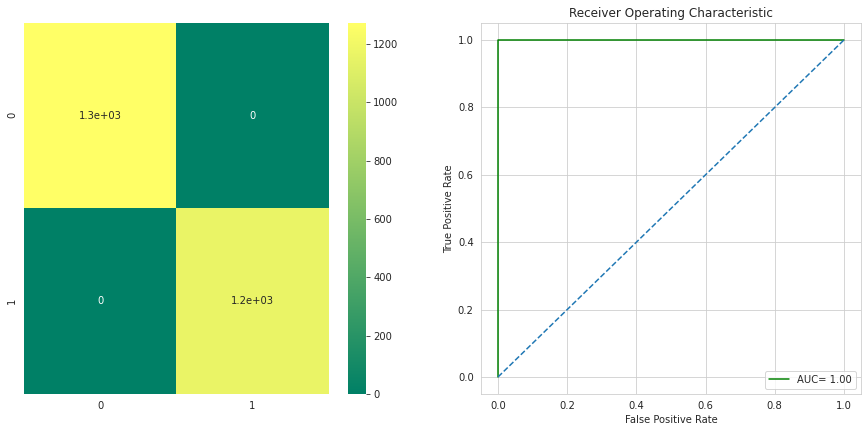

In [50]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## Random Forest Classifier

 Cross val accuracy:   [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]  

 Mean of cross val accuracies:   1.0


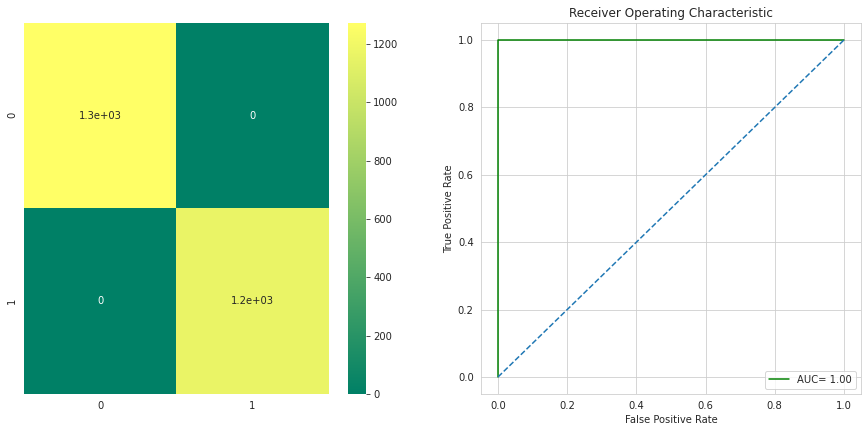

In [51]:
clf = RandomForestClassifier().fit(X_train, y_train)
accuracy=cross_val_score(clf, X_train , y_train, cv=10, scoring='accuracy')
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)
auc_roc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('\033[1m','Cross val accuracy: ', '\033[0m', accuracy, '\033[1m', '\n\n', 'Mean of cross val accuracies: ', '\033[0m', np.mean(accuracy))
plt.figure(figsize=(15, 15))
plt.subplot(221)
sns.heatmap(confusion, cmap='summer', annot=True);
plt.subplot(222)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='green', label='AUC= %0.2f'%roc_auc);
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

The highest accuracy is given by random forest classifier an accuracy of 1.0. Decision tree classifier gave an accuracy of 0.99982 and logistic regression 0.99964. Gaussian Naive Bayes gave the lowest accuracy among these 4 models choosen an accuracy of 0.9525.